# 🪙 ¿Está esta moneda trucada? Una prueba de hipótesis

Este notebook utiliza una prueba de hipótesis para determinar si una moneda está trucada (sesgada) basándonos en el resultado de una serie de lanzamientos.

## El Planteamiento Estadístico

Para abordar el problema, definimos dos hipótesis opuestas:

-   **Hipótesis Nula ($H_0$)**: La moneda es justa. La probabilidad de obtener cara es del 50% ($p = 0.5$).
-   **Hipótesis Alternativa ($H_1$)**: La moneda está trucada. La probabilidad de obtener cara es diferente del 50% ($p \neq 0.5$).

Nuestro objetivo es usar los datos de los lanzamientos para decidir si tenemos suficiente evidencia para **rechazar la hipótesis nula** en favor de la alternativa.

Usaremos dos conceptos clave:
-   **Nivel de Confianza (y umbral $\alpha$)**: Es el grado de certeza que queremos tener para tomar nuestra decisión. Comúnmente se usa un 95% de confianza, lo que corresponde a un umbral de significancia `α = 0.05`.
-   **p-valor**: Es la probabilidad de obtener un resultado tan extremo como el observado (o más), **asumiendo que la moneda es justa ($H_0$ es cierta)**.

In [1]:
# Importamos la función necesaria de scipy.stats
from scipy.stats import binomtest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo para los gráficos
sns.set_theme(style="whitegrid")

## Paso 1: Introducir los Resultados del Experimento

Aquí definimos los resultados de nuestro experimento de lanzamiento de monedas y nuestro umbral de decisión.

-   `n_lanzamientos`: El número total de veces que se lanzó la moneda.
-   `n_caras`: El número de veces que el resultado fue "cara".
-   `alpha`: Nuestro umbral de significancia. Si el p-valor es menor que `alpha`, rechazaremos la hipótesis nula.

In [22]:
# --- ¡MODIFICA ESTOS VALORES PARA EXPERIMENTAR! ---

# Parámetros del experimento
n_lanzamientos = 1000  # Total de tiradas
n_caras = 560       # Número de caras observadas

# Nivel de confianza y umbral de significancia
confianza = 0.99
alpha = 1 - confianza

# --- CÁLCULO ESTADÍSTICO ---

# Realizamos una prueba binomial. Esta prueba es perfecta para nuestro caso.
# H0: La probabilidad de éxito (cara) es 0.5
prueba_resultado = binomtest(k=n_caras, n=n_lanzamientos, p=0.5, alternative='two-sided')

# Extraemos el p-valor del resultado
p_valor = prueba_resultado.pvalue

## Paso 2: La Decisión Estadística

Ahora comparamos el p-valor calculado con nuestro umbral de significancia `alpha`.

La regla de decisión es simple:

-   **Si `p-valor <= alpha`**: El resultado que observamos es muy poco probable si la moneda fuera justa. Por lo tanto, **rechazamos la hipótesis nula ($H_0$)**. Tenemos evidencia estadística para afirmar que la moneda está trucada.
-   **Si `p-valor > alpha`**: El resultado es razonablemente probable si la moneda fuera justa. No tenemos suficiente evidencia para rechazar la hipótesis nula. **"Fallamos en rechazar" $H_0$** y consideramos que la moneda es justa.

In [23]:
# Imprimimos los resultados de forma clara
print(f"--- Resultados de la Prueba de Hipótesis ---")
print(f"Lanzamientos totales: {n_lanzamientos}")
print(f"Caras observadas: {n_caras} ({(n_caras/n_lanzamientos)*100:.2f}%)")
print(f"Umbral de significancia (alpha): {alpha}")
print(f"P-valor calculado: {p_valor:.4f}")
print("-" * 45)

# Tomamos la decisión
if p_valor <= alpha:
    print(f"Conclusión: RECHAZAMOS la hipótesis nula.")
    print(f"El p-valor ({p_valor:.4f}) es menor o igual que alpha ({alpha}). Hay evidencia estadística para sugerir que la moneda está trucada.")
else:
    print(f"Conclusión: NO PODEMOS RECHAZAR la hipótesis nula.")
    print(f"El p-valor ({p_valor:.4f}) es mayor que alpha ({alpha}). No hay suficiente evidencia estadística para afirmar que la moneda está trucada.")

--- Resultados de la Prueba de Hipótesis ---
Lanzamientos totales: 1000
Caras observadas: 560 (56.00%)
Umbral de significancia (alpha): 0.010000000000000009
P-valor calculado: 0.0002
---------------------------------------------
Conclusión: RECHAZAMOS la hipótesis nula.
El p-valor (0.0002) es menor o igual que alpha (0.010000000000000009). Hay evidencia estadística para sugerir que la moneda está trucada.


## Visualización del Resultado

Un gráfico puede ayudarnos a entender qué significa el p-valor. Mostraremos la distribución de probabilidad de obtener un número de caras en 100 lanzamientos *si la moneda fuera justa*. Las áreas rojas representan los resultados "extremos" que nos harían sospechar.

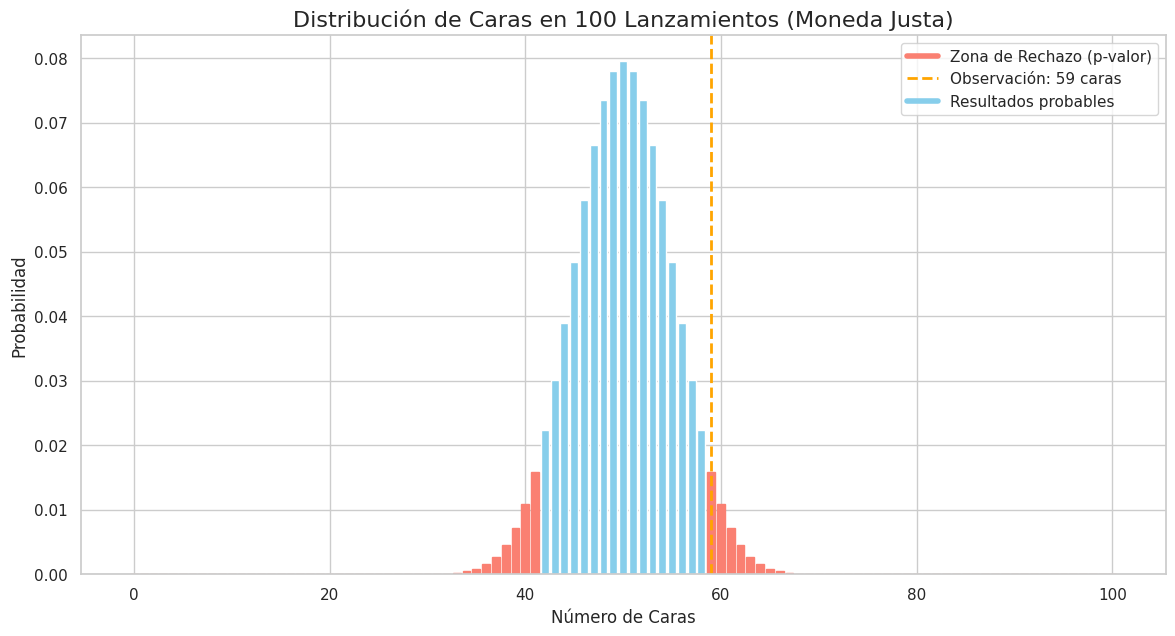

In [11]:
from scipy.stats import binom

# Creamos la distribución binomial para una moneda justa
x = np.arange(0, n_lanzamientos + 1)
prob_dist = binom.pmf(x, n_lanzamientos, 0.5)

# Calculamos el umbral de "extremo"
# Aquí usamos una aproximación para visualizar. Los valores más extremos que el observado.
distancia_de_la_media = abs(n_caras - n_lanzamientos * 0.5)
limite_inferior = n_lanzamientos * 0.5 - distancia_de_la_media
limite_superior = n_lanzamientos * 0.5 + distancia_de_la_media

plt.figure(figsize=(14, 7))
bars = plt.bar(x, prob_dist, color='skyblue', label='Probabilidad para una moneda justa')
plt.title(f'Distribución de Caras en {n_lanzamientos} Lanzamientos (Moneda Justa)', fontsize=16)
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')

# Resaltamos nuestra observación y las zonas de rechazo (valores extremos)
plt.axvline(n_caras, color='orange', linestyle='--', linewidth=2, label=f'Observación: {n_caras} caras')
for i in range(len(x)):
    if x[i] <= limite_inferior or x[i] >= limite_superior:
        bars[i].set_color('salmon')

# Creamos una leyenda para las zonas de rechazo
plt.legend(handles=[plt.Line2D([0], [0], color='salmon', lw=4, label='Zona de Rechazo (p-valor)'),
                      plt.Line2D([0], [0], color='orange', linestyle='--', lw=2, label=f'Observación: {n_caras} caras'),
                      plt.Line2D([0], [0], color='skyblue', lw=4, label='Resultados probables')])

plt.show()